# Logistic regression on early detection

In [50]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [51]:
# importing the imputed data

df = pd.read_csv("Imputed_data_Ivan.csv")
df

,LLHold,LLLatency,LRHold,LRLatency,RLHold,RLLatency,RRHold,RRLatency,LLHoldStd,LLLatencyStd,...,RHoldSkew,RLatencySkew,LHoldKurt,LLatencyKurt,RHoldKurt,RLatencyKurt,LRHold_Diff,LLRRLatency_Diff,LRRLLatency_Diff,Parkinsons
0,97.654140,406.716242,107.138017,411.718182,100.917949,430.258974,96.400784,365.736471,25.840600,162.606085,...,7.402816,0.446804,0.805770,-0.699806,106.075763,-0.725689,-2.581164,40.979771,-18.540793,0
1,64.452941,390.058823,66.233333,600.433333,68.500000,536.407143,64.341176,394.647059,10.799197,199.162594,...,0.239309,-0.208674,-0.233988,-0.775209,-0.109231,-1.327965,1.156507,-4.588235,64.026190,0
2,143.399528,347.882547,105.325886,313.541489,163.700000,310.799454,106.208750,322.170833,51.115372,101.977747,...,2.804074,-0.115531,0.797792,0.285031,23.790534,-0.215556,47.072756,25.711714,2.742036,0
3,144.314980,528.670445,180.632743,575.478761,156.391710,501.274093,159.277778,493.779630,42.482348,137.542548,...,0.264594,-0.364617,0.595533,-0.409263,0.520341,-0.042387,-18.904747,34.890816,74.204668,0
4,124.285207,300.323155,127.421731,335.508287,125.795492,321.131506,124.941855,332.621036,21.626193,81.749015,...,0.353481,-0.024474,5.019808,-0.741563,5.034476,-0.901017,-1.202048,-32.297880,14.376781,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,74.382119,233.183499,71.242987,249.604979,76.069314,282.845343,75.168615,262.600722,15.847420,68.129255,...,8.103708,0.929794,11.708047,0.692850,103.310649,1.547799,1.842681,-29.417223,-33.240364,0
82,104.445555,284.901879,114.021725,215.023762,102.083155,255.127555,114.708130,271.448199,43.152219,144.554373,...,0.065245,1.584906,196.537883,1.271138,2.400487,3.098033,-10.969995,13.453680,-40.103793,0
83,103.366013,249.626144,141.265306,262.962245,104.287387,247.860360,147.900000,350.363077,24.085334,75.679672,...,-0.368180,-0.033922,5.034818,0.918322,2.103608,-1.017572,-40.157634,-100.736933,15.101885,1
84,147.086450,505.747519,147.248437,456.021354,146.607565,580.315603,136.493676,545.699209,32.984655,139.372280,...,2.553821,0.323904,1.404602,-0.693057,19.824505,-0.903855,3.895622,-39.951690,-124.294249,0


In [52]:
# choosing the features and target data
X = df.iloc[:,0:51]
y = df.iloc[:,51]  # Target is the Parkinsons column


## Because data is on different orders of magnitude, we standardize the data 

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

In [55]:
scaler.fit(X)

StandardScaler()

In [56]:
X_scaled = scaler.transform(X)

In [57]:
from sklearn.model_selection import train_test_split

## Splitting the data into testing and training sets

In [58]:
# Split the scaled mdata into training and testing using stratify 

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,
                                                test_size=.2,
                                                shuffle=True,
                                                random_state=614,
                                                stratify=y)

## Now we fit the traing data with a logistic regression model 

In [59]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10000)

In [60]:
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [61]:
y_train_pred = log_reg.predict(X_train)

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
# The confusion matrix 
confusion_matrix(y_train, y_train_pred)

array([[38,  5],
       [10, 15]], dtype=int64)

In [72]:
# Precision and recall 

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("The precision of the model is " + np.array2string(precision_score(y_train, y_train_pred)))
print("The recall of the model is " + np.array2string(recall_score(y_train, y_train_pred)))

The precision of the model is 0.75
The recall of the model is 0.6


In [65]:
# function to obtain accuracy of the model 

def get_acc(y_pred,y_actual):
    return np.sum(y_pred == y_actual)/len(y_actual)

In [69]:
print("The accuracy of the model is " + np.array2string(get_acc(y_train_pred,y_train)))

The accuracy of the model is 0.77941176


In [18]:
probs_train = log_reg.predict_proba(X_train)


In [19]:
from sklearn.metrics import roc_curve

In [20]:
# The ROC curve 

roc_curve(y_train,probs_train[:,1])

(array([0.        , 0.        , 0.        , 0.02325581, 0.02325581,
        0.04651163, 0.04651163, 0.11627907, 0.11627907, 0.23255814,
        0.23255814, 0.25581395, 0.25581395, 0.27906977, 0.27906977,
        0.30232558, 0.30232558, 0.3255814 , 0.3255814 , 1.        ]),
 array([0.  , 0.04, 0.2 , 0.2 , 0.52, 0.52, 0.6 , 0.6 , 0.68, 0.68, 0.8 ,
        0.8 , 0.84, 0.84, 0.88, 0.88, 0.96, 0.96, 1.  , 1.  ]),
 array([1.90315969, 0.90315969, 0.83655495, 0.81259898, 0.60638951,
        0.576156  , 0.54344942, 0.51340966, 0.4899213 , 0.41498519,
        0.39886491, 0.39858642, 0.39817178, 0.39444812, 0.36264998,
        0.33871171, 0.30555122, 0.29187123, 0.29052396, 0.00383252]))

In [21]:
fpr_train,tpr_train,cutoffs_train = roc_curve(y_train,probs_train[:,1])

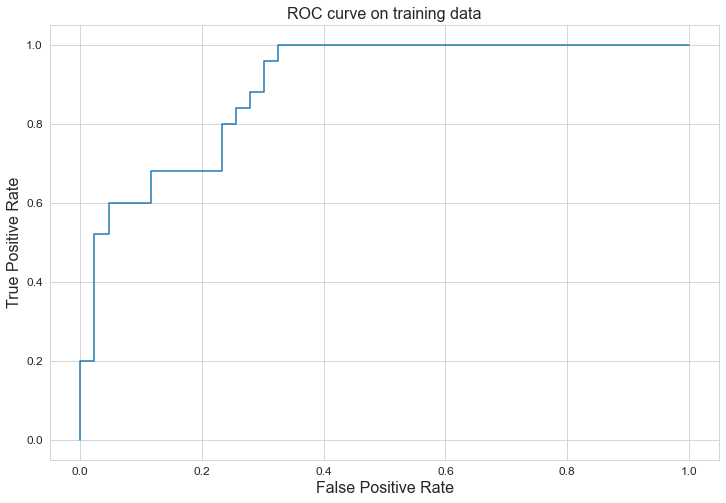

In [22]:
## Sample Solution
plt.figure(figsize=(12,8))

plt.plot(fpr_train,tpr_train)

plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("ROC curve on training data",fontsize=16)

plt.show()

In [23]:
plt.close()

In [24]:
from sklearn.metrics import roc_auc_score

In [73]:
print("The AUC of the model is " + np.array2string(roc_auc_score(y_train,probs_train[:,1])))

The AUC of the model is 0.89302326


In [26]:
coeff_train=pd.DataFrame(log_reg.coef_, columns= [X.columns])

<IPython.core.display.Javascript object>


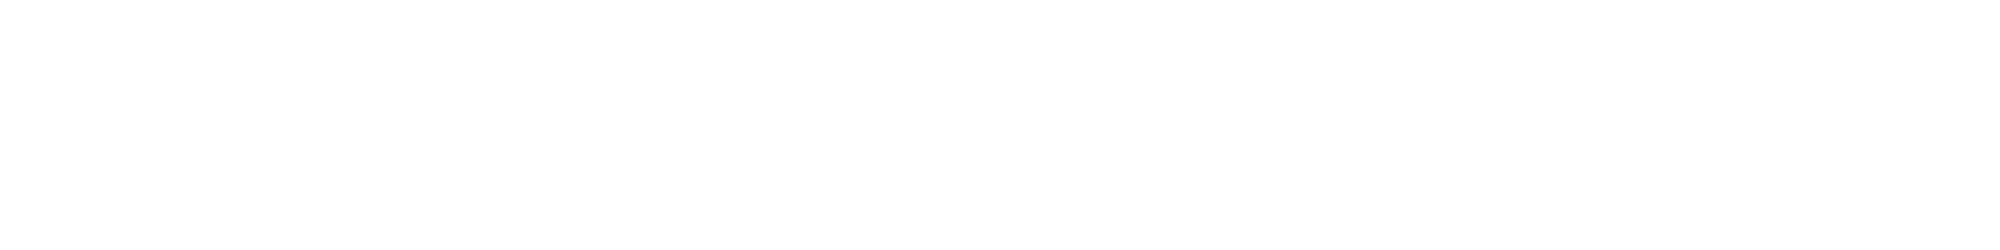

In [27]:
%matplotlib notebook


sns.set_style("white")


plt.matshow(log_reg.coef_, cmap = 'plasma')

#plt.yticks([0,1],X.columns,fontsize = 8)

plt.colorbar()

plt.xticks(range(len(X.columns)),
           X.columns,
           rotation=90,
           fontsize = 8)

plt.ylabel("Feature", fontsize = 8)
plt.title("Logistic regression coefficients on training data")

plt.show()

In [28]:
plt.close()

## Now we run the model on the test data

In [29]:
#log_reg.fit(X_test,y_test)
y_test_pred = log_reg.predict(X_test)
confusion_matrix(y_test, y_test_pred)

array([[9, 2],
       [3, 4]], dtype=int64)

In [30]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(precision_score(y_test, y_test_pred))
print(recall_score(y_test, y_test_pred))

0.6666666666666666
0.5714285714285714


In [31]:
get_acc(y_test_pred,y_test)

0.7222222222222222

In [32]:
probs_test = log_reg.predict_proba(X_test)

In [33]:
roc_curve(y_test,probs_test[:,1])

(array([0.        , 0.        , 0.        , 0.09090909, 0.09090909,
        0.18181818, 0.18181818, 0.45454545, 0.45454545, 1.        ]),
 array([0.        , 0.14285714, 0.28571429, 0.28571429, 0.42857143,
        0.42857143, 0.71428571, 0.71428571, 1.        , 1.        ]),
 array([1.73883904, 0.73883904, 0.72043381, 0.71267163, 0.59853736,
        0.57952389, 0.48098579, 0.32671538, 0.27672916, 0.01975838]))

In [46]:
fpr_test,tpr_test,cutoffs_test = roc_curve(y_test,probs_test[:,1])

<IPython.core.display.Javascript object>


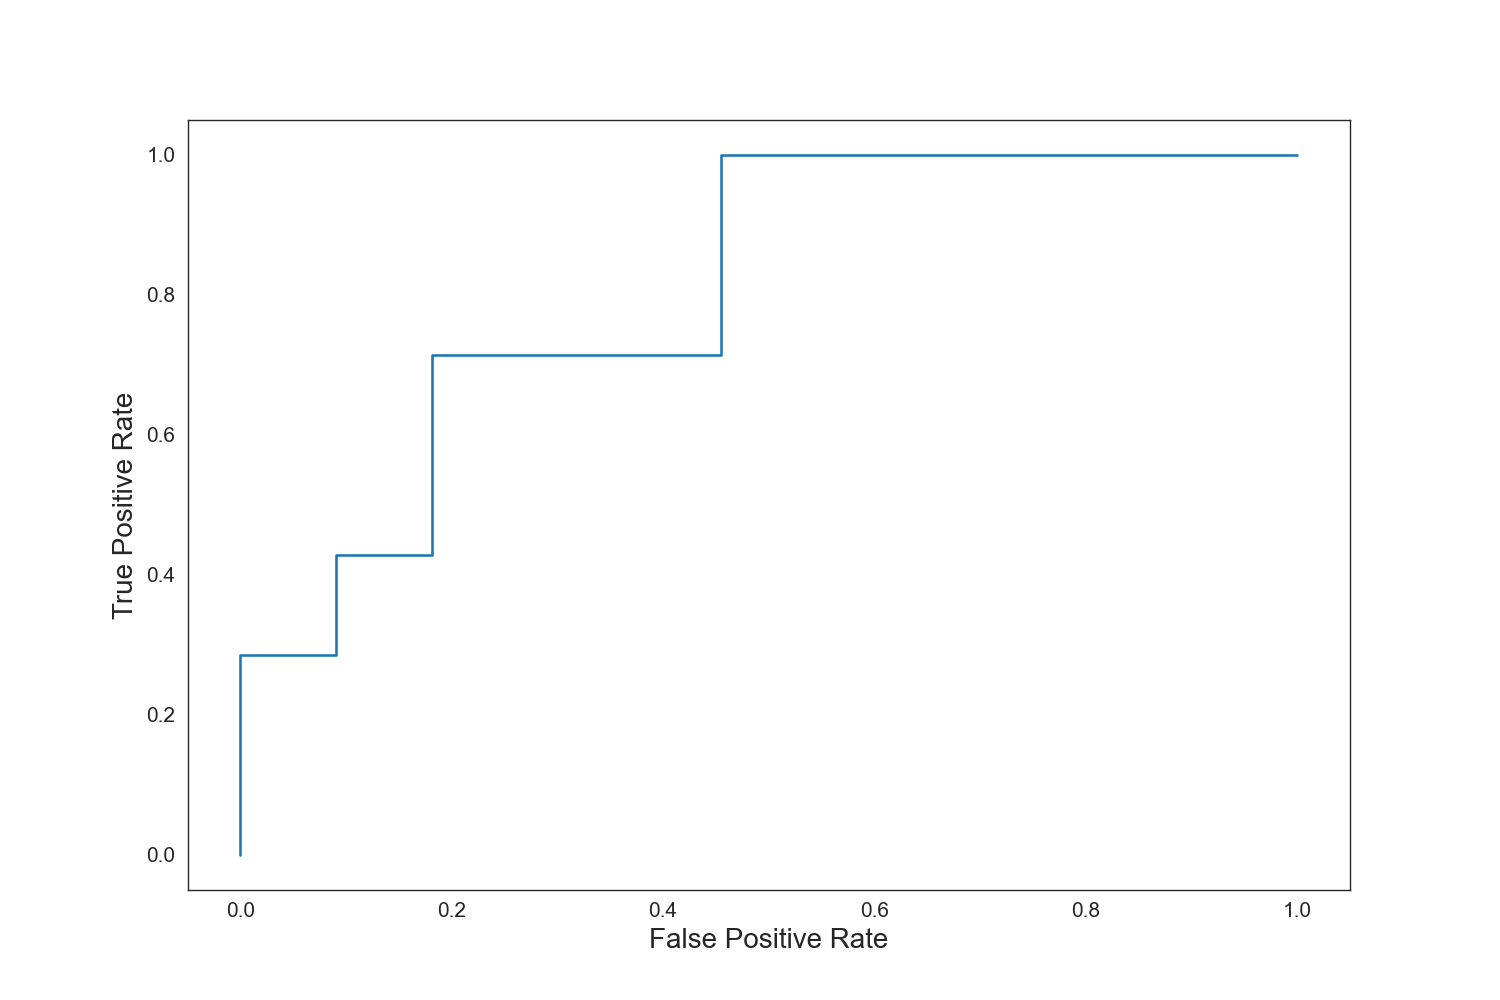

In [47]:
plt.figure(figsize=(12,8))

plt.plot(fpr_test,tpr_test)

plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


In [48]:
plt.close()

In [49]:
roc_auc_score(y_test,probs_test[:,1])

0.8051948051948051

In [43]:
plt.close()